# Lesson outline

In this lesson, you will learn about some advanced CNN architectures. Here is the lesson outline

* Classification and localization
* Bounding boxes and regression
* Regional proposal
* Regional CNN
* Fast R-CNN
* Faster R-CNN
* Detection with and without proposals

### Classification and Localization

__Classification__

* `Objective:` The goal of classification is to assign a label or category to an entire image. It answers the question: "What is in this image?"
* `Process:` A deep learning model (typically a Convolutional Neural Network, or CNN) processes the image and predicts the most likely class from a predefined set of categories. For example, given an image of a cat, the model classifies the image as 'cat.'
* `Example:` ImageNet is a popular dataset used for classification tasks, where models are trained to predict thousands of classes like "dog," "car," or "flower."

__Localization :__

* `Objective:` Localization extends classification by not only identifying the object in an image but also determining its position within the image. It answers: "Where is the object in this image?"
* `Process:` The model predicts a bounding box around the object in addition to the class label. The bounding box is typically defined by four coordinates `(x_min, y_min, x_max, y_max)`, which represent the object's location.
* `Example:` If an image contains a cat, localization involves classifying the object as a 'cat' and drawing a bounding box around it.


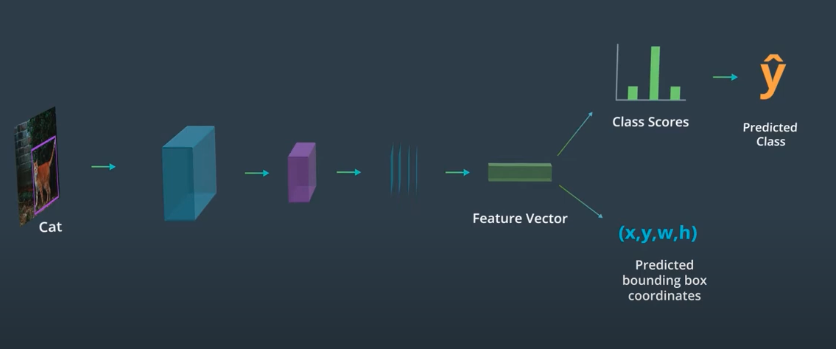


### Bounding Boxes and Regression

To predict bounding boxes, we train a model to take an image as input and output coordinate values: (x, y, w, h). This kind of model can be extended to any problem that has coordinate values as outputs! One such example is human pose estimation

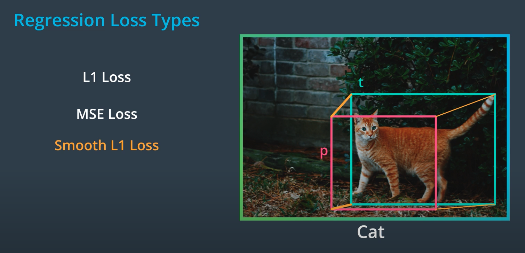

__Weighted Loss Functions__

You may be wondering: how can we train a network with two different outputs (a class and a bounding box) and different losses for those outputs?

We know that, in this case, we use categorical cross entropy to calculate the loss for our predicted and true classes, and we use a regression loss (something like smooth L1 loss) to compare predicted and true bounding boxes. But, we have to train our whole network using one loss, so how can we combine these?

There are a couple of ways to train on multiple loss functions, and in practice, we often use a weighted sum of classification and regression losses (ex. `0.5*cross_entropy_loss + 0.5*L1_loss`); the result is a single error value with which we can do backpropagation. This does introduce a hyperparameter: the loss weights. We want to weight each loss so that these losses are balanced and combined effectively, and in research we see that another regularization term is often introduced to help decide on the weight values that best combine these losses.

### Region Proposals
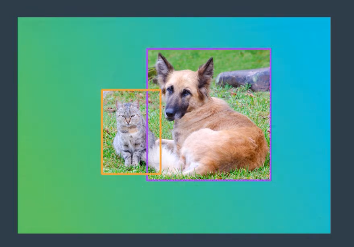

In the above image we have predicted one object using the bounding box, what if we have more than 1 object in the image ?  How to localize and label the all objects in the image ? 


we can think of it as a crop a sub image as below and send the cropped image though the model to predict the object in the croped region and label it 
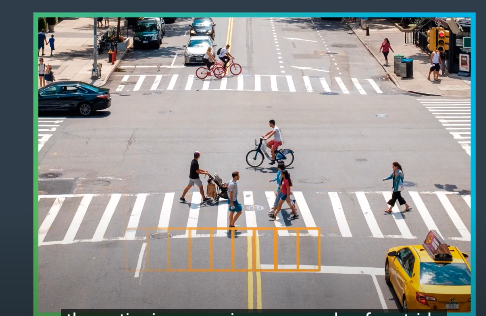 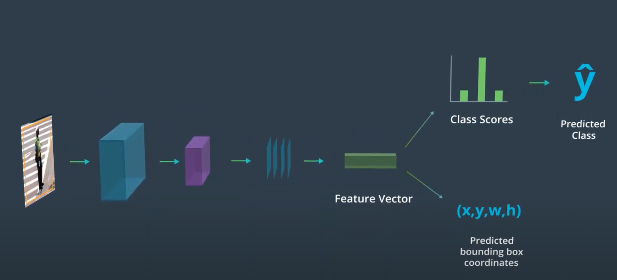

__Challenge :__ Here the problem is when we crop the sumparts of the image, there will be chances where we will have lot of empty cropped images which will be a challenging task to complete. Also we can not detect all the images aa there is a chance the we miss the image as we will not be able to crop entire image all the times.


### R-CNN (Region Convolutional Neural Networks)

The R-CNN is the least sophisticated region-based architecture, but it is the basis for understanding how multiple object recognition algorithms work! It outputs a class score and bounding box coordinates for every input RoI(Regions of Interest).

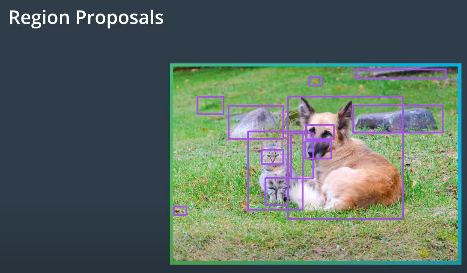

__Region proposals give us a way to quickly look at an image and generate regions only for which we think there may be an object. We can use traditional computer vision techniques that detect things like edges and texture bobs to produce a set of regions in which objects are most likely to be found. Areas of similar texture or the same unifying boundary for example.__

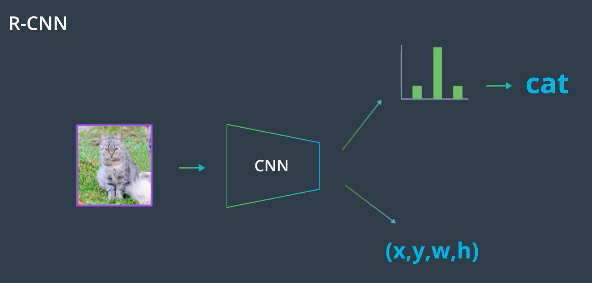 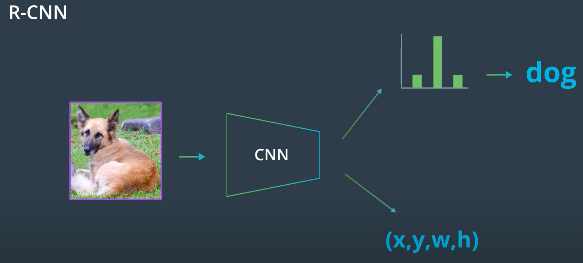

An R-CNN feeds an image into a CNN with regions of interest (RoI’s) already identified. Since these RoI’s are of varying sizes, they often need to be warped to be a standard size, since CNN’s typically expect a consistent, square image size as input. After RoI's are warped, the R-CNN architecture, processes these regions one by one and, for each image, produces 1. a class label and 2. a bounding box (that may act as a slight correction to the input region).

1. R-CNN produces bounding box coordinates to reduce localization errors; so a region comes in, but it may not perfectly surround a given object and the output coordinates `(x,y,w,h)` aim to perfectly localize an object in a given region.
2. R-CNN, unlike other models, does not explicitly produce a confidence score that indicates whether an object is in a region, instead it cleverly produces a set of class scores for which one class is "background". This ends up serving a similar purpose, for example, if the class score for a region is `Pbackground = 0.10`, it likely contains an object, but if it's `Pbackground = 0.90`, then the region probably doesn't contain an object.


### Fast R-CNN

This is the advancement of the R-CNN architecture, Instead of the processing the each image of the region of interest individually through a classification CNN, This architecture runs the entire image through the classification CNN only once. The image goes through the convolutional and pooling layers, at the end of these layer we get the stack of feature maps. We still need to find the regions of interest but instead of cropping the original image, we project these proposals into the smaller feature map layer. Each region in the feature map corresponds to a larger region in the original image. So we can grap the selected regions in this feature map and feed them one by one into a fully connected layer that generates a class for each of these different regions. 

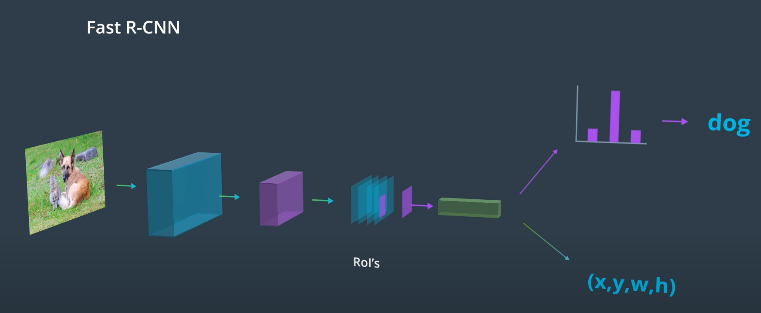 

__ROI Pooling :__ RoI Pooling
To warp regions of interest into a consistent size for further analysis, some networks use RoI pooling. RoI pooling is an additional layer in our network that takes in a rectangular region of any size, performs a maxpooling operation on that region in pieces such that the output is a fixed shape. Below is an example of a region with some pixel values being broken up into pieces which pooling will be applied to; a section with the values:
`[[0.85, 0.34, 0.76],
 [0.32, 0.74, 0.21]]`

  Will become a single max value after pooling: 0.85. After applying this to an image in these pieces, you can see how any rectangular region can be forced into a smaller, square representation.
 
 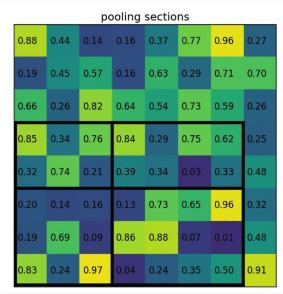  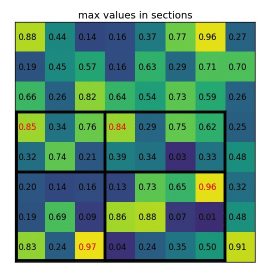 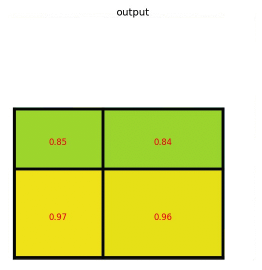
 


Before giving the feature maps produced from the entire image to a fully connected layers for identifying the objects, we have to handle the variable sizes and these protections, since layers further in the network are expecting input of fixed size. So we do something called ROI Pooling  to warp those regions into a consistant size before giving them to a fylly connected layer .

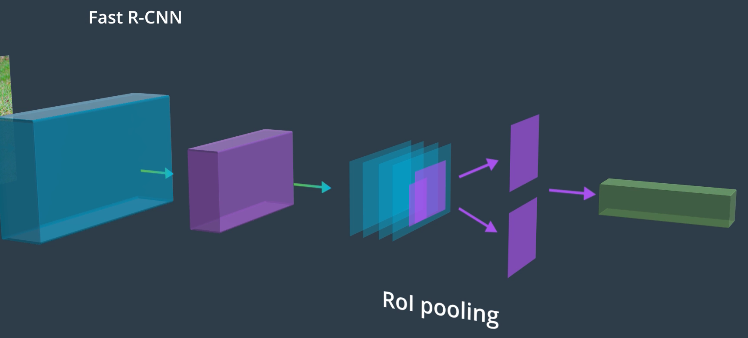


__Challenges :__ This is faster than the R-CNN, but when it comes to the test image for which it has to generate region proposals and it's still looking at the regions that do not contain any objects at all. Next architecture we will look at aims to imrpove this region generation step.



### Faster R-CNN

To speed up the time it takes to run a test image through a network and detect all the objects in it, we want to decrease the time it takes to form region proposals. for this we have the faster R-CNN architecture. Faster R-CNN learns to come up with it's own region proposals. It takes in an input image, runs it through a CNN up until a certain convolutional layer just like Fast R-CNN, but this time it uses the produced feature map as a input into a separate region proposal network. So it predicts it's own region from the features produced inside the network. 
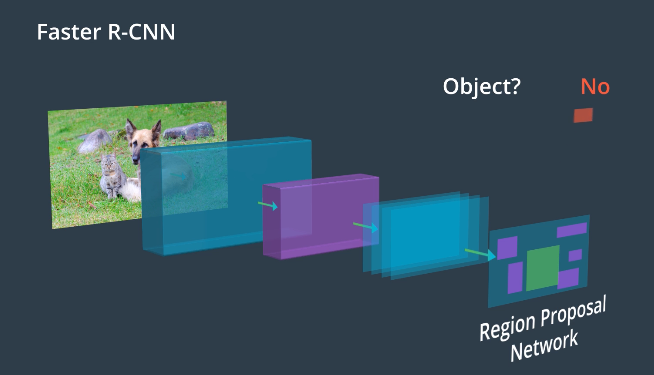

If an area in the feature map is rich in detected edges or other features, it's identified as a region of interest. Then this part of the network does a quick binary classification. For each ROI it checks whether or not that region contains an object. If it does then it will continue on and go through the classification steps and if it doesn't, then the proposal is discarded. 

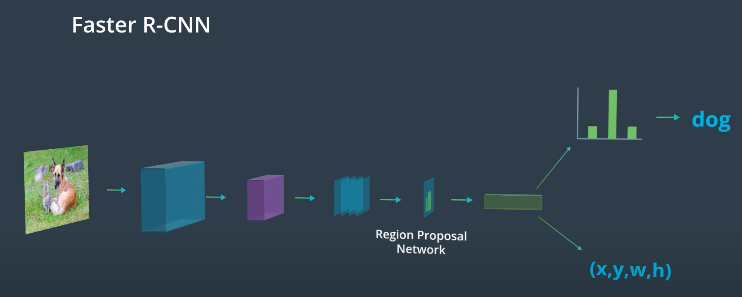

Once we have the final region of interest proposals rest of the network is same as Fast R-CNN network. It takes the cropped regions from the feature map and learns to classify those regions. By elimininating the analysis of the non-object regions, this model is the fastest of the all the region-based CNNs that we have seen. 

__Region Proposal Network :__

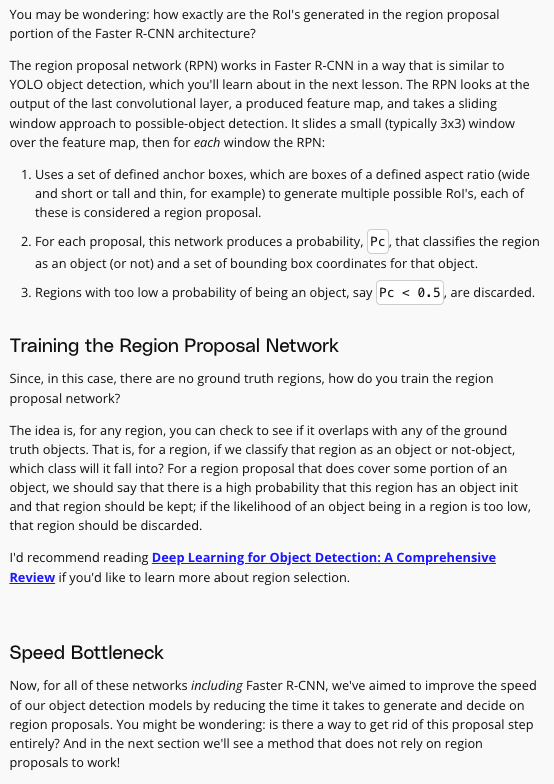


Next : We will learn about `yolo` which will not use the region proposal networks to detect the objects in an image. Another one is SSD (Single Shot Detection) these both came out around the same time. And in the next lesson you'll learn all about YOLO and get a chance to work with a code implementation of a `YOLO Detection Network`.